### Description of data

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:
- key - a unique identifier for each trip
- fare_amount - the cost of each trip in usd
- pickup_datetime - date and time when the meter was engaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged

### Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [4]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [30]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [32]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [33]:
df.shape

(200000, 9)

In [34]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [35]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

## Handling Null values

In [36]:
# drop null rows
df.dropna(axis=0,inplace=True)

In [37]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [38]:
# Calculate the distance between the pickup and drop coordinates
# using the Haversine formula for accuracy

def haversine(lon_1,lon_2,lat_1,lat_2):
    lon_1,lon_2,lat_1,lat_2 = map(np.radians, [lon_1,lon_2,lat_1,lat_2])  #Degree of radius
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2-lat_1
    km = 2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2))
    return km

#find distance travelled per ride
df['distance'] = haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

#round it to 2 decimal points
df['distance'] = df['distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [39]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
dtype: object

### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#### **Let's see the statistical analysis of the dataset**

### Histogram: Distribution of Fare Amount

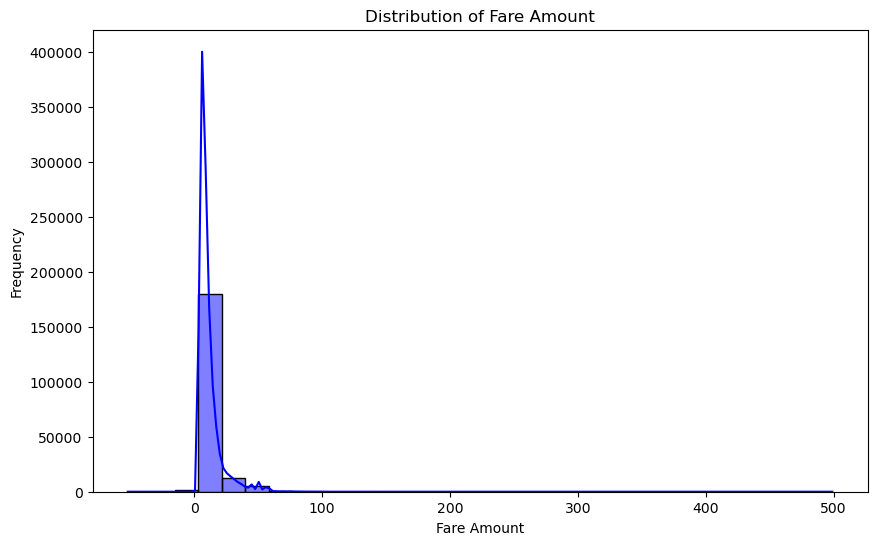

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

- The histogram shows that the majority of fare amounts are concentrated between 0 and 20, indicating that most trips are short-distance or low-cost.
- There are a few outliers with higher fares, suggesting some longer or premium trips, but these are rare.
- The distribution is highly skewed to the right

## Line Plot: Fare Amount by distance

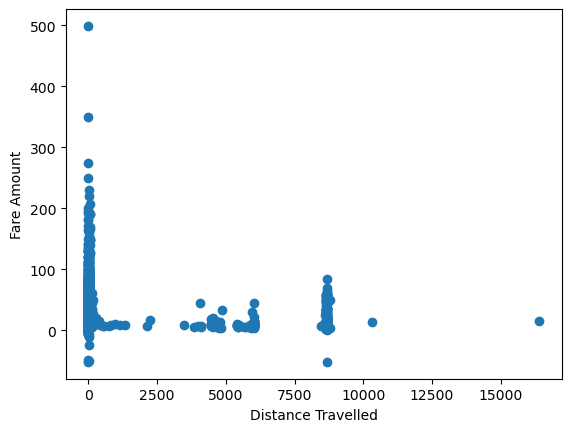

In [42]:
plt.scatter(df['distance'],df['fare_amount'])
plt.xlabel('Distance Travelled')
plt.ylabel('Fare Amount')
plt.show()

In [43]:
#Outliers
#We can get rid of the trips with very large distance that are outliers as well as trips with 0 distance

df.drop(df[df['distance']>60].index, inplace=True)
df.drop(df[df['distance']==0].index, inplace=True)
df.drop(df[df['fare_amount']==0].index, inplace=True)
df.drop(df[df['fare_amount']<0].index, inplace=True)
df.shape

(193490, 10)

In [44]:
# removing row with non-plausible fare_amount and distance travelled

df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index,inplace=True)
df.drop(df[(df['fare_amount']<100) & (df['distance']>100)].index,inplace=True)
df.shape

(193481, 10)

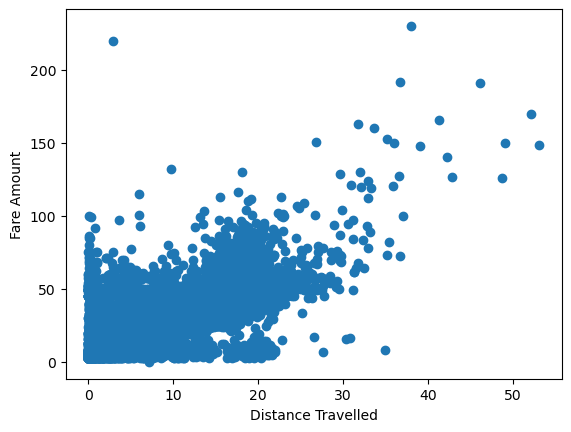

In [45]:
plt.scatter(df['distance'],df['fare_amount'])
plt.xlabel('Distance Travelled')
plt.ylabel('Fare Amount')
plt.show()

## Creating a Correlation Heatmap

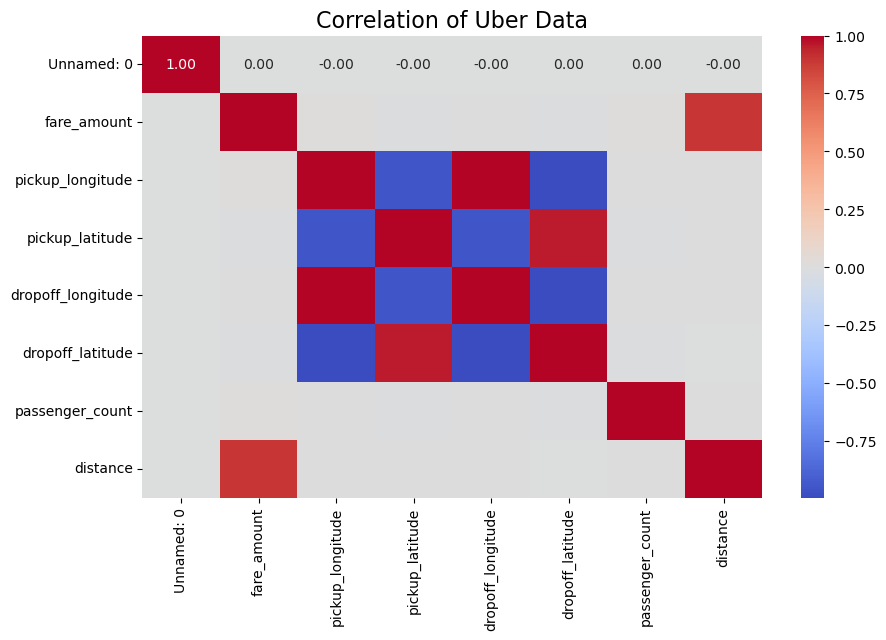

In [46]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation of Uber Data", fontsize=16)
plt.show()

- As it is shown clearly in the correlation matrix that fare_amount has high correlation with distance

In [48]:
# create dataframe of specific column

df1 = pd.DataFrame().assign(fare=df['fare_amount'], distance=df['distance'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   distance  193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


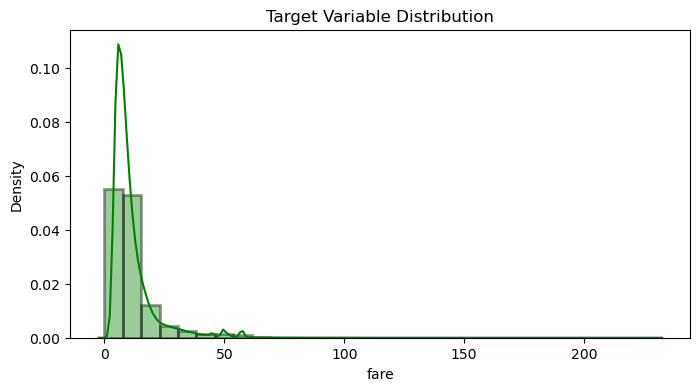

In [49]:
# plot target fare distribution

plt.figure(figsize=[8,4])
sns.distplot(df1['fare'],color='g',hist_kws=dict(edgecolor='black',linewidth=2),bins=30)
plt.title('Target Variable Distribution')
plt.show()

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

## Defining predictor variance for the regression model

In [52]:
X = pd.DataFrame(df1['distance'])
y = df1['fare']

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=45)

In [54]:
len(X_train), len(X_test), len(y_train),len(y_test)

(129632, 63849, 129632, 63849)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

## Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

- Standardization is used to transform data into a standard normal distribution, ensuring that all features are on the same scale

In [59]:
# Standardize numerical features (mean=0, std=1) for better model performance.

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [60]:
scaled_X_train

array([[-0.25290927],
       [-0.54400856],
       [ 1.06951321],
       ...,
       [-0.74361951],
       [-0.52460194],
       [-0.75748138]])

In [61]:
scaled_X_test

array([[-0.58518802],
       [-0.6437793 ],
       [ 1.0274673 ],
       ...,
       [-0.23922044],
       [ 4.7298784 ],
       [-0.56844765]])

## Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
model = RandomForestRegressor(n_estimators=10,random_state=42)

In [64]:
model.fit(scaled_X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [65]:
y_predicted = model.predict(scaled_X_test)
y_predicted

array([ 6.66642097,  5.8467573 , 21.21742314, ...,  9.1744597 ,
       49.19085   ,  6.42773005])

## Model Evaluation

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
mae = mean_absolute_error(y_test,y_predicted)
mse = mean_squared_error(y_test,y_predicted)
r2_score = r2_score(y_test,y_predicted)

In [69]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2_score: {r2_score}')

Mean Absolute Error: 2.32020211416795
Mean Squared Error: 18.496882013940688
R2_score: 0.7941341118543168


## Check Residuals

In [72]:
# Residuals are the differences between the actual values (y_test) and predicted values (y_pred).

residuals = y_test - y_predicted

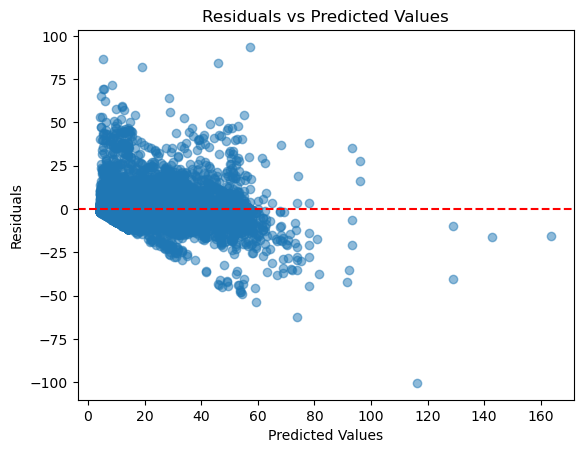

In [73]:
#Plot Residuals vs Fitted Values

plt.scatter(y_predicted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

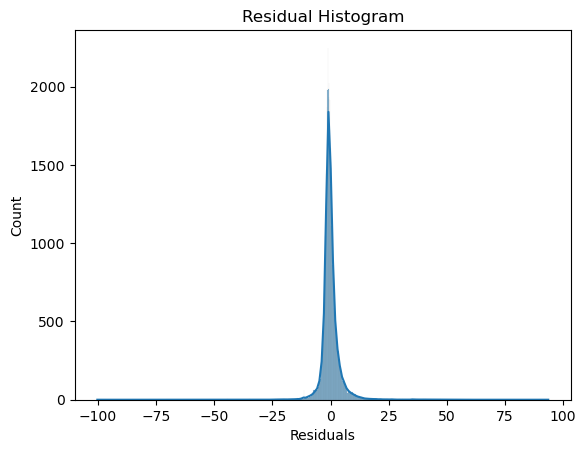

In [74]:
# Residual Histogram

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Histogram')
plt.show()

**The residuals are normally distributed (symmetrical around 0).**

## Interpret feature importance

In [76]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


In [77]:
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
    Feature  Importance
0  distance         1.0


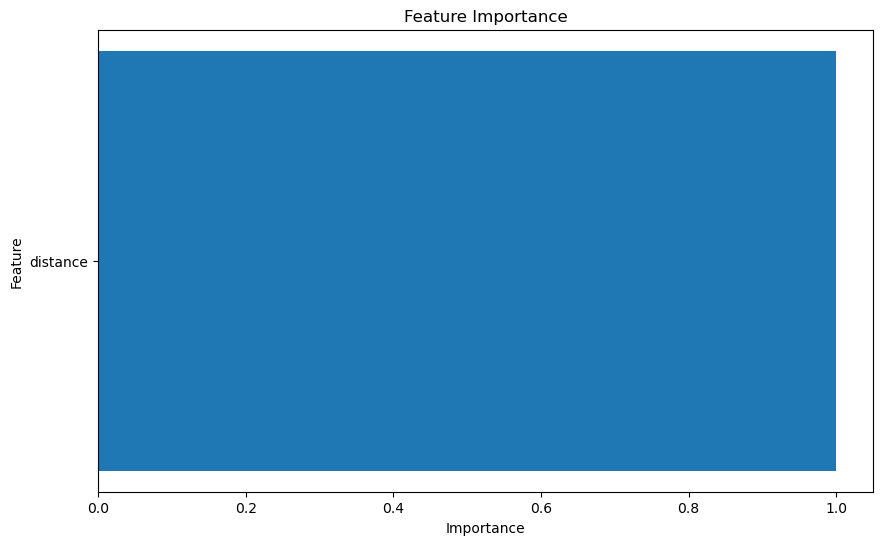

In [79]:

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Predictions on New Data

In [96]:
# Define new data
new_data = pd.DataFrame({
    "distance": [12.5],          
    "time_of_day_morning": [1],  
    "time_of_day_afternoon": [0], 
    "time_of_day_evening": [0],
    "passenger_count": [2]       
})

In [97]:
# Align new_data with training data columns
for col in X.columns:
    if col not in new_data:
        new_data[col] = 0  

new_data = new_data[X.columns]  

In [98]:
# Predict fare
predicted_fare = model.predict(new_data)
print("\nPredicted Fare for New Data:")
print(predicted_fare)



Predicted Fare for New Data:
[139.046]


### Recommendations
1. Adjust pricing strategies based on impactful features like distance and time of day.
2. Offer incentives to drivers operating during high-demand hours.
3. Improve service in areas where higher fares are predicted.
4. Introduce ride-pooling discounts to reduce costs for riders.
5. Launch affordable subscription plans for frequent riders.
6. Enhance fare transparency by showing clear breakdowns.
7. Offer off-peak ride discounts to improve vehicle utilization.
8. Include accessibility services like wheelchair-friendly vehicles.
9. Reward frequent riders with loyalty programs and credits.
10. Notify riders about surge pricing and suggest alternate times.